Time Series Analysis

In [65]:
#Importing the required libraries
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [66]:
plt.rcParams.update({'figure.figsize': (9, 6), 'figure.dpi': 120, 'figure.autolayout': True, 
                     'axes.labelcolor': 'black', 'axes.edgecolor': 'black'})

plt.style.use("bmh")



This is a line of code using the matplotlib library in Python to update the default settings for creating plots. Specifically, it updates two parameters using the `plt.rcParams.update()` method:

- figure.figsize : This parameter sets the default size of the figure (plot) in inches. In this case, it sets the default size to be 10 inches wide and 7 inches tall.

- figure.dpi : This parameter sets the default resolution (dots per inch) for the figure. In this case, it sets the default resolution to be 120 DPI.

- figure.autolayout :Set to True, which automatically adjusts the margins and spacing of the plot to fit the content of the figure.

By updating these parameters, this line of code allows for consistent figure sizing and resolution across multiple plots in a script or notebook. This can be useful for creating clean, professional-looking visualizations.

In [67]:
# importing the data
df = pd.read_csv('a10.csv', parse_dates=['date'])

df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [68]:
df.dtypes

date     datetime64[ns]
value           float64
dtype: object

The 'parse_dates' parameter is used to specify which columns in the CSV file should be parsed as dates. In this case, the 'date' column is specified, so the values in that column will be converted to a datetime format when the file is read into memory.

In [69]:
df.shape

(204, 2)

In [70]:
df.info

<bound method DataFrame.info of           date      value
0   1991-07-01   3.526591
1   1991-08-01   3.180891
2   1991-09-01   3.252221
3   1991-10-01   3.611003
4   1991-11-01   3.565869
..         ...        ...
199 2008-02-01  21.654285
200 2008-03-01  18.264945
201 2008-04-01  23.107677
202 2008-05-01  22.912510
203 2008-06-01  19.431740

[204 rows x 2 columns]>

Panel Data VS Vector Autoregression

Panel data, also known as longitudinal data or cross-sectional time-series data, is a type of data that contains observations of multiple variables for the same individuals or entities over time. Panel data is commonly used in economics, finance, and social sciences for studying the relationships between variables and how they change over time.

In panel data, the same individuals or entities are observed at multiple points in time, allowing researchers to track changes in variables over time and study the relationships between variables at the individual or entity level. Panel data can be organized in a rectangular format, where each row corresponds to an individual or entity, and each column corresponds to a variable measured at a particular time point.

Panel data can be used to estimate both cross-sectional and time-series relationships. Panel data analysis methods take into account the dependence between observations for the same individual or entity, which can improve the accuracy of statistical inference compared to using independent cross-sectional or time-series data alone. Some common methods used for analyzing panel data include fixed effects models, random effects models, and pooled regression models.

Panel data and Vector Autoregression (VAR) are both used to analyze relationships between variables, but they are different in their data structure, assumptions, and applications.

Panel data consists of observations of multiple variables for the same individuals or entities over time, while VAR models are used to analyze the interdependence among multiple time series variables measured at the same time points. Panel data can be used to study how the values of a variable change over time for a particular individual or entity, and how those changes are related to other variables, while VAR models are used to study how changes in one variable are related to changes in other variables in a system over time.

In terms of assumptions, panel data models typically assume that the individual-specific effects are fixed or random, and that the error terms are independently and identically distributed. VAR models, on the other hand, assume that the time series variables are stationary, meaning that their means, variances, and autocovariances are constant over time.

In terms of applications, panel data models are commonly used in economics, finance, and social sciences to study individual or entity-level effects, while VAR models are commonly used in macroeconomics, finance, and engineering to model complex systems with multiple interdependent variables.

Here's an example that highlights the differences between panel data and VAR models:

Suppose we are interested in studying the relationship between GDP, investment, and government spending in a country over time. We have two datasets:

1. Panel data: We have annual data on GDP, investment, and government spending for multiple countries over a period of 10 years. Each row of the dataset represents a country, and each column represents a variable measured at a particular time point.

2. VAR data: We have monthly data on GDP, investment, and government spending for a single country over a period of 10 years. Each row of the dataset represents a month, and each column represents a variable measured at the same time point.

Using the panel data, we can estimate a panel data regression model to study how GDP, investment, and government spending are related at the country level over time. We can control for country-specific effects by including fixed or random effects in the model. For example, we might estimate a model like:

GDP_i,t = β_0 + β_1 Investment_i,t + β_2 GovtSpending_i,t + α_i + ε_i,t

where GDP_i,t is the GDP of country i at time t, Investment_i,t is the investment of country i at time t, GovtSpending_i,t is the government spending of country i at time t, α_i is the country-specific fixed effect, and ε_i,t is the error term.

Using the VAR data, we can estimate a VAR model to study the dynamic relationships among GDP, investment, and government spending over time. For example, we might estimate a model like:

ΔGDP_t = β_01 + β_11ΔGDP_(t-1) + β_12ΔInvestment_(t-1) + β_13ΔGovtSpending_(t-1) + ε_1,t
ΔInvestment_t = β_02 + β_21ΔGDP_(t-1) + β_22ΔInvestment_(t-1) + β_23ΔGovtSpending_(t-1) + ε_2,t
ΔGovtSpending_t = β_03 + β_31ΔGDP_(t-1) + β_32ΔInvestment_(t-1) + β_33ΔGovtSpending_(t-1) + ε_3,t

where ΔGDP_t, ΔInvestment_t, and ΔGovtSpending_t are the first differences of GDP, investment, and government spending at time t, β_11, β_12, β_13, β_21, β_22, β_23, β_31, β_32, and β_33 are the coefficients of the model, and ε_1,t, ε_2,t, and ε_3,t are the error terms.

In summary, panel data and VAR models are used for different types of data and research questions. Panel data models are used to study the relationships between variables at the individual or entity level over time, while VAR models are used to study the dynamic relationships among multiple time series variables measured at the same time points.

Text(0, 0.5, 'Sales')

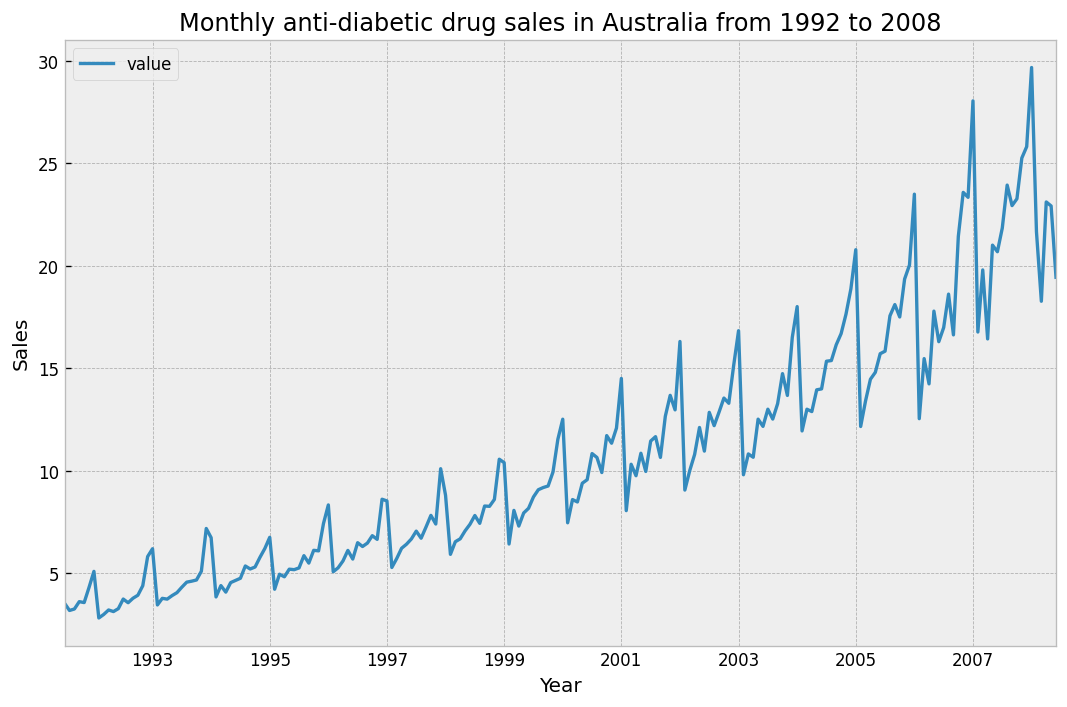

In [71]:
#Visualizing Time Series

df.set_index("date").plot()
plt.title('Monthly anti-diabetic drug sales in Australia from 1992 to 2008')
plt.xlabel('Year')
plt.ylabel('Sales')



In [72]:
#Box plot month wise and year wise distribution
df['year'] = [d.year for d in df.date]
df['month'] = [d.month for d in df.date]
years=df['year'].unique()


In [73]:
df

,date,value,year,month
0,1991-07-01,3.526591,1991,7
1,1991-08-01,3.180891,1991,8
2,1991-09-01,3.252221,1991,9
3,1991-10-01,3.611003,1991,10
4,1991-11-01,3.565869,1991,11
...,...,...,...,...
199,2008-02-01,21.654285,2008,2
200,2008-03-01,18.264945,2008,3
201,2008-04-01,23.107677,2008,4
202,2008-05-01,22.912510,2008,5


In [74]:
years

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008])

These lines of code add two new columns 'year' and 'month' to the DataFrame df, based on the date column. The first line extracts the year for each date in the 'date' column and assigns it to a new column called 'year'. The second line extracts the month for each date in the 'date' column and assigns it to a new column called 'month'.

years=df['year'].unique() creates a new variable years which is a NumPy array containing the unique values of the 'year' column in the DataFrame df. This will be useful if you want to loop over the unique years in the DataFrame to perform some operations or generate plots for each year separately.

<Axes: xlabel='month', ylabel='value'>

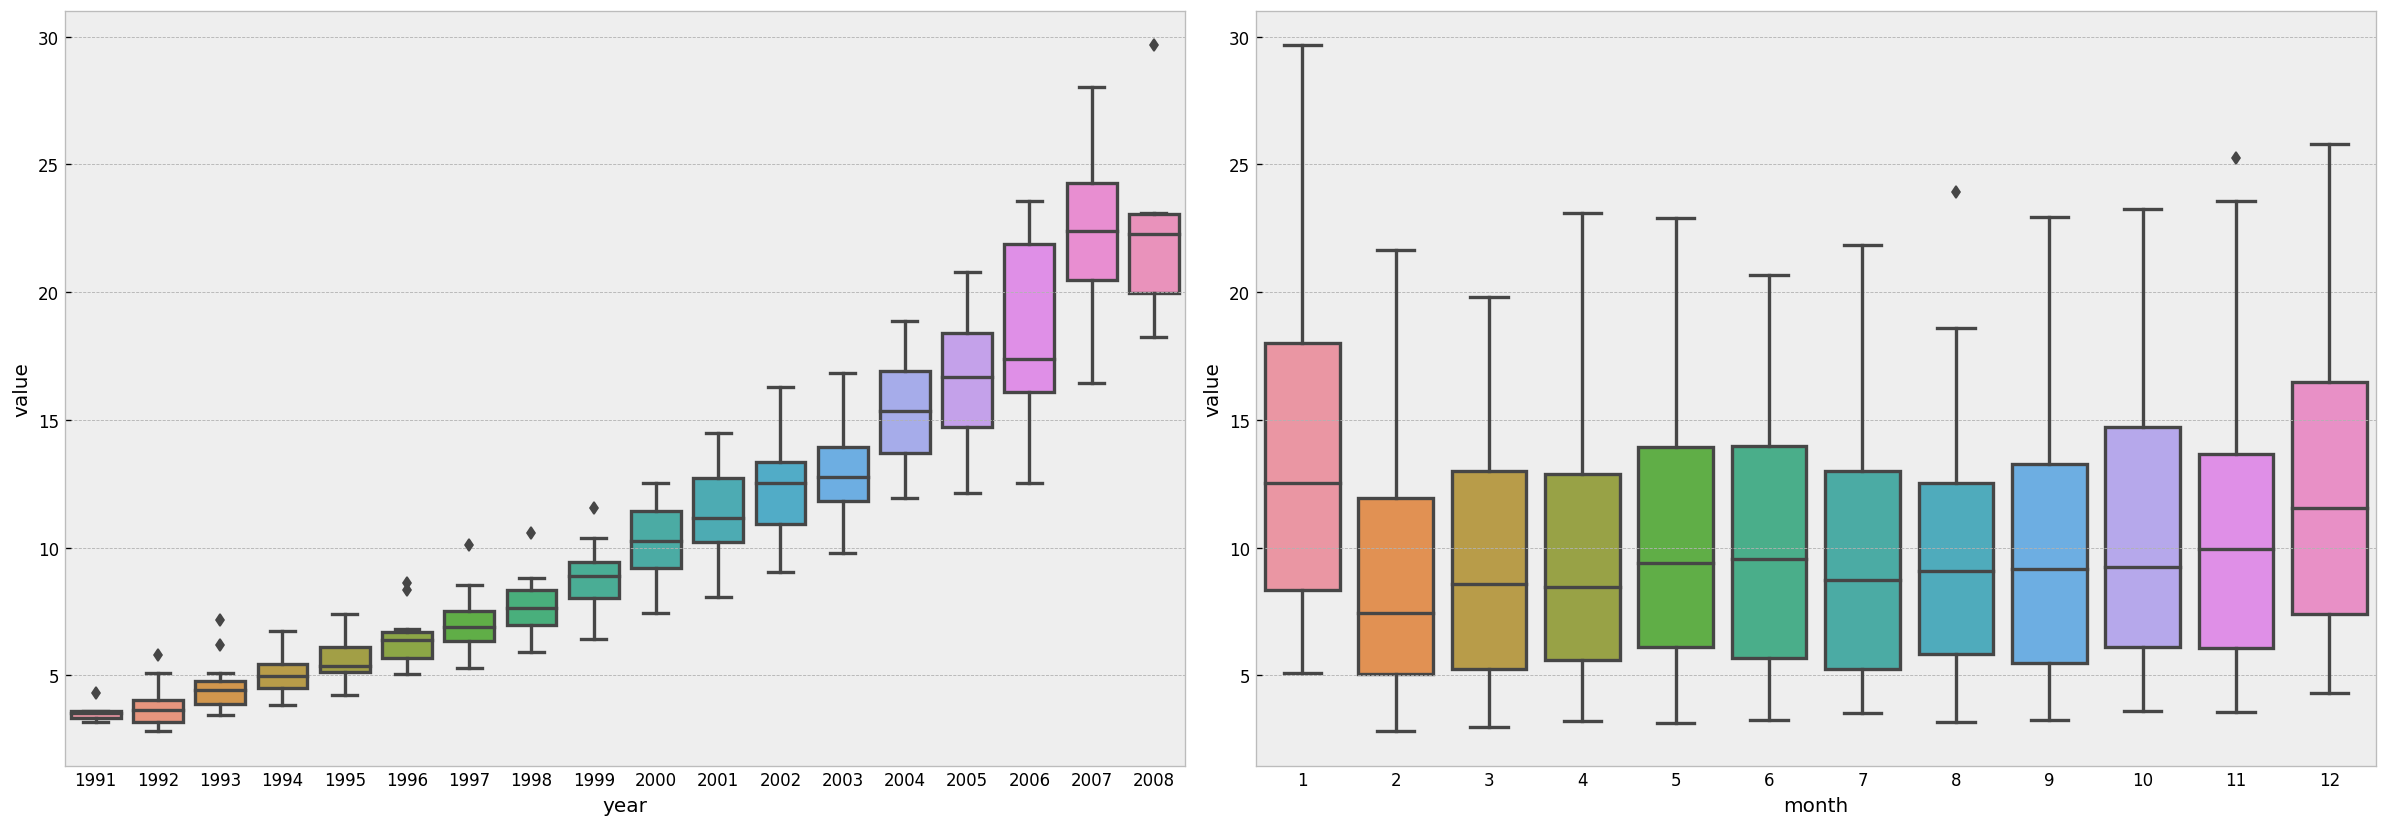

In [75]:
#Subplotting

fig, axes = plt.subplots(1, 2, figsize=(20, 7))
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df, ax=axes[1])

<Axes: xlabel='month', ylabel='value'>

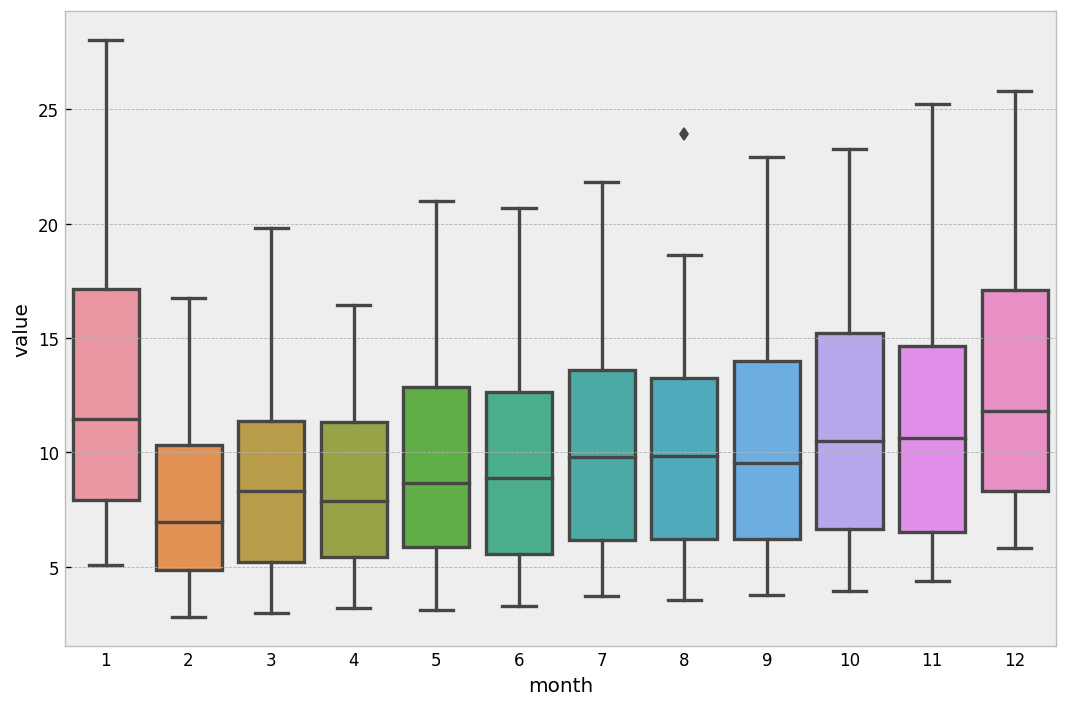

In [76]:
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

<Axes: xlabel='month', ylabel='value'>

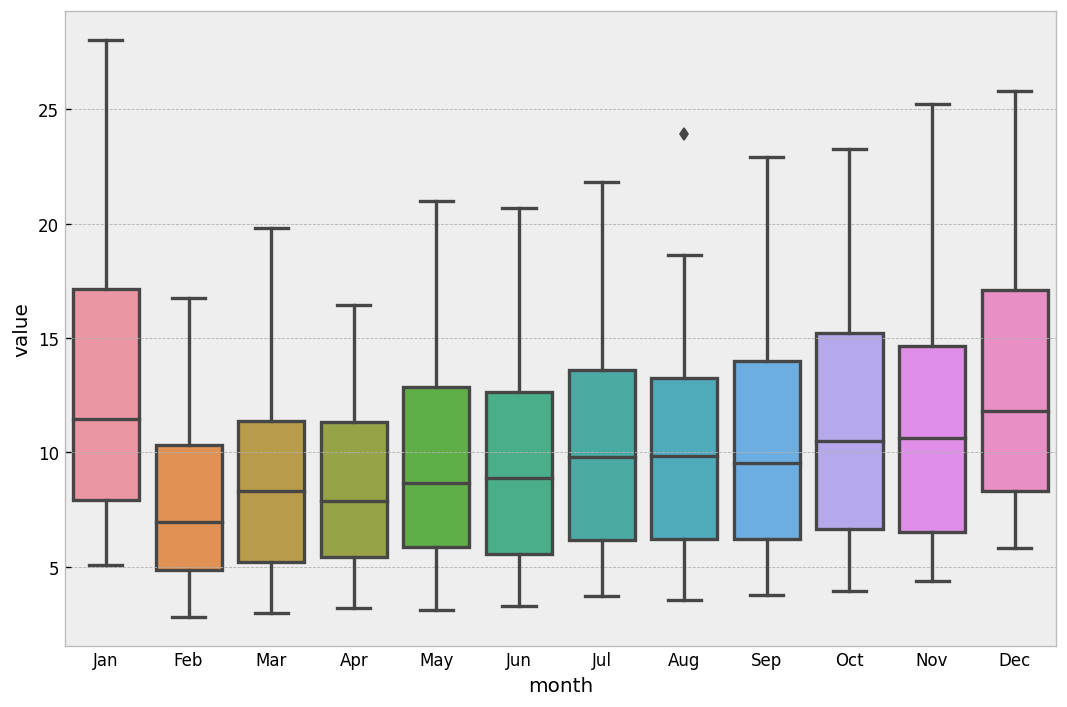

In [77]:
df['month'] = [d.strftime('%b') for d in df.date]
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

df.year.isin([1991, 2008]) creates a Boolean mask that is True for rows where the 'year' column is either 1991 or 2008, and False for all other rows.
~df.year.isin([1991, 2008]) applies the logical NOT operator (~) to the Boolean mask, which flips all True values to False and all False values to True. This creates a new Boolean mask that is True for rows where the 'year' column is not equal to 1991 or 2008, and False for rows where the 'year' column is either 1991 or 2008.
df.loc[~df.year.isin([1991, 2008]), :] uses the Boolean mask to select the rows from the original DataFrame df that satisfy the condition (i.e., where 'year' is not equal to 1991 or 2008), and selects all columns (:) in those rows. The result is a new DataFrame called data that contains only the rows with valid years.

<Axes: xlabel='month', ylabel='value'>

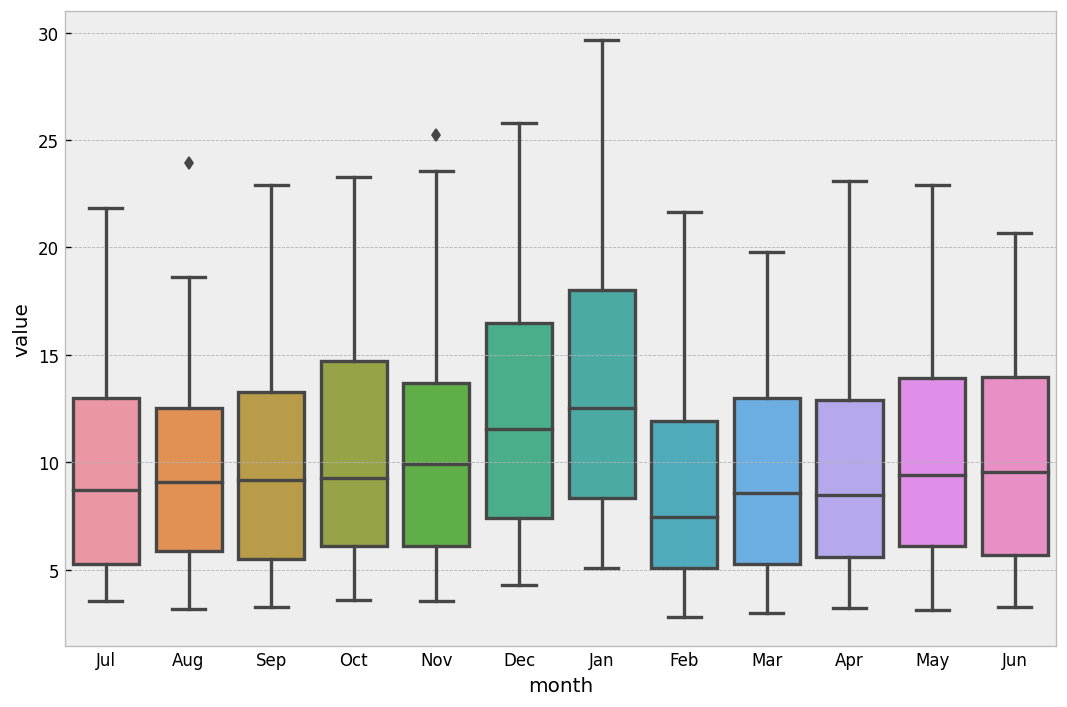

In [78]:
sns.boxplot(x='month', y='value', data=df)

Patterns in a time series:

Time series data can often be decomposed into four main components:

Base Level: The average value of the series over time, which represents the long-term mean or baseline of the data.

Trend: The overall pattern or direction of the series over time, which represents the upward or downward movement of the series over a longer period of time.A trend is observed when there is an increasing or decreasing slope in the time series.

Seasonality: The repetitive and predictable fluctuations in the series that occur at regular intervals, such as daily, weekly, monthly, or yearly patterns.

Error or Residual: The random or irregular fluctuations in the series that cannot be explained by the other components, which represent the unexplained variability or noise in the data.

The decomposition of a time series can help to isolate these components and better understand the underlying patterns and structure in the data. This information can then be used to develop more accurate forecasting models or to identify anomalies or outliers in the data. However, it's not mandatory that all time series must have a trend and/seasonality.

<Axes: title={'center': 'Trend and Seasonality'}, xlabel='date'>

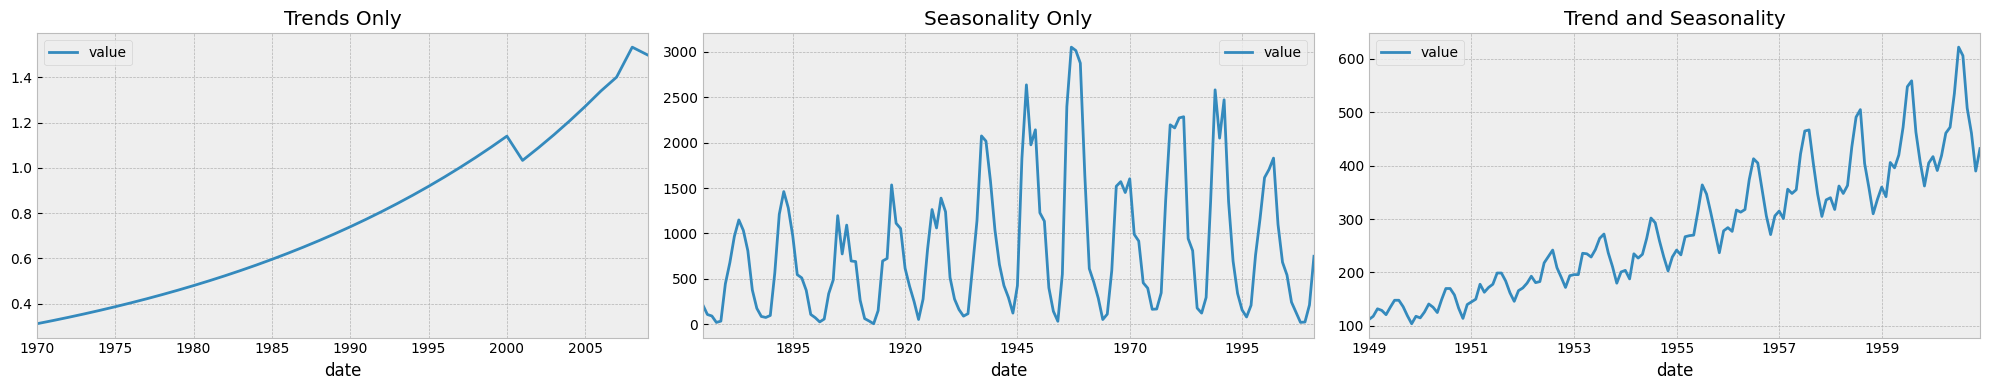

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(20,4), dpi=100)
pd.read_csv("guinearice.csv", parse_dates=["date"], index_col="date").plot(title= "Trends Only", ax=axes[0])
pd.read_csv("sunspotarea.csv", parse_dates=["date"], index_col="date").plot(title= "Seasonality Only", ax=axes[1])
pd.read_csv("AirPassengers.csv", parse_dates=["date"], index_col="date").plot(title= "Trend and Seasonality", ax=axes[2])

Seasonal patterns and cyclic patterns are both periodic patterns that can be observed in time series data, but they have different characteristics.

Seasonal patterns are repetitive patterns that occur at fixed and known intervals of time, such as daily, weekly, monthly, or yearly patterns. These patterns can be caused by natural phenomena (e.g. seasonal weather changes) or by human behavior (e.g. holiday seasons, end-of-quarter sales). Seasonal patterns are typically easy to identify and model, and they can be used to make short-term forecasts or to understand the impact of seasonality on the data.

Cyclic patterns, on the other hand, are also repetitive patterns that occur over time, but they do not have fixed or known intervals like seasonal patterns. Instead, cyclic patterns are more irregular and can occur over longer or shorter periods of time, and they may be caused by a variety of factors such as economic cycles or business cycles. Cyclic patterns are typically harder to identify and model than seasonal patterns, and they may require more sophisticated techniques such as spectral analysis or wavelet analysis.

Identifying cyclic patterns in time series data can be challenging, as cyclic patterns are often more irregular and less predictable than seasonal patterns. However, there are some methods that can be used to identify cyclic patterns:

1. Visual inspection: The first step is to plot the time series data and visually inspect it for any patterns that may repeat over time. Look for cycles that occur at irregular intervals, such as business cycles, economic cycles, or political cycles.

2. Autocorrelation: Autocorrelation is a measure of how correlated a time series is with itself at different lags. Cyclic patterns can often be detected in the autocorrelation plot as periodic spikes that repeat at regular intervals.

3. Spectral analysis: Spectral analysis is a method for decomposing a time series into its frequency components. Cyclic patterns can often be detected in the frequency spectrum as peaks at certain frequencies or harmonics.

4. Wavelet analysis: Wavelet analysis is a method for analyzing the time-frequency characteristics of a time series. It can be used to identify cyclic patterns that occur over a range of frequencies and time scales.

5. Statistical models: Statistical models such as ARIMA or state-space models can be used to identify and model cyclic patterns in time series data. These models can capture the cyclic behavior of the data and provide forecasts for future cycles.

In summary, identifying cyclic patterns in time series data may require a combination of visual inspection, autocorrelation analysis, spectral analysis, wavelet analysis, and statistical modeling. It is important to consider the nature of the data and the potential causes of the cyclic patterns in order to choose the appropriate method for analysis.


Additive and Multiplicate Time Series

Additive and multiplicative time series are two different ways of modeling the relationship between the trend, seasonal, and error components of a time series. The main difference between them is in how the seasonal component is modeled:

Additive Time Series: In an additive time series, the seasonal component is modeled as a fixed pattern that is added to the trend and error components. 

It is linear and changes by the same amount over time. 

Mathematically, an additive time series can be expressed as:

Y(t) = Trend(t) + Seasonal(t) + Error(t)

In this model, the seasonal component is assumed to have a constant magnitude over time, regardless of the level of the trend. This means that the seasonal variation is independent of the level of the time series.

Multiplicative Time Series: In a multiplicative time series, the seasonal component is modeled as a relative pattern that is multiplied by the trend and error components. 

It is non-linear, such as quadratic or exponential, meaning that the change increases or decreases over time. 

Mathematically, a multiplicative time series can be expressed as:

Y(t) = Trend(t) x Seasonal(t) x Error(t)

In this model, the seasonal component is assumed to have a proportional relationship with the trend. This means that the seasonal variation is dependent on the level of the time series, and the magnitude of the seasonal component increases as the level of the trend increases.

In general, additive models are more appropriate when the magnitude of the seasonal variation is constant over time, while multiplicative models are more appropriate when the magnitude of the seasonal variation is proportional to the level of the time series. However, it is important to note that the choice of model depends on the nature of the data and the specific application, and both models may be appropriate for different time series.

In [80]:
#How to decompose a time series into its components and fin out if a time series is additive or multicative
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Import Data
df = pd.read_csv('a10.csv', parse_dates=['date'], index_col='date')

#Additive decomposition
result_add = seasonal_decompose(df["value"], model='additive', extrapolate_trend="freq")

#Multiplicative decomposition
result_mul = seasonal_decompose(df["value"], model='multiplicative', extrapolate_trend="freq")



In [81]:
result_add.trend

date
1991-07-01     3.060085
1991-08-01     3.124765
1991-09-01     3.189445
1991-10-01     3.254125
1991-11-01     3.318805
                ...    
2008-02-01    24.037399
2008-03-01    24.298458
2008-04-01    24.559516
2008-05-01    24.820574
2008-06-01    25.081633
Name: trend, Length: 204, dtype: float64

In [82]:
result_add.seasonal

date
1991-07-01   -0.140765
1991-08-01    0.027747
1991-09-01   -0.090361
1991-10-01    0.602876
1991-11-01    0.970698
                ...   
2008-02-01   -2.232334
2008-03-01   -1.469959
2008-04-01   -1.518226
2008-05-01   -0.624341
2008-06-01   -1.086958
Name: seasonal, Length: 204, dtype: float64

In [83]:
result_add.resid

date
1991-07-01    0.607271
1991-08-01    0.028379
1991-09-01    0.153137
1991-10-01   -0.245998
1991-11-01   -0.723634
                ...   
2008-02-01   -0.150780
2008-03-01   -4.563554
2008-04-01    0.066387
2008-05-01   -1.283723
2008-06-01   -4.562935
Name: resid, Length: 204, dtype: float64

In [84]:
result_add.observed

date
1991-07-01     3.526591
1991-08-01     3.180891
1991-09-01     3.252221
1991-10-01     3.611003
1991-11-01     3.565869
                ...    
2008-02-01    21.654285
2008-03-01    18.264945
2008-04-01    23.107677
2008-05-01    22.912510
2008-06-01    19.431740
Name: value, Length: 204, dtype: float64

The code you provided uses the `seasonal_decompose()` function from the `statsmodels` library to decompose a time series `df["value"]` into its constituent components (trend, seasonality, and residuals) using an additive model. 

The `model` parameter is set to `'additive'` to indicate that the time series is assumed to have an additive structure. The `extrapolate_trend` parameter is set to `'freq'` to indicate that the trend component should be extended to cover the full time range of the input data. Setting `extrapolate_trend` takes care of any missing values in the trends and residuals at the beginning of the series. 

The output of the `seasonal_decompose()` function is stored in the `result_add` variable, which is a `DecomposeResult` object containing the decomposed components of the time series. This object has four attributes: `trend`, `seasonal`, `resid`, and `observed`. 

- `result_add.trend` contains the estimated trend component of the time series. 
- `result_add.seasonal` contains the estimated seasonal component of the time series.
- `result_add.resid` contains the estimated residuals of the time series after removing the trend and seasonal components.
- `result_add.observed` contains the original time series data.

These components can be visualized separately or together to gain insight into the underlying patterns and fluctuations in the time series.

Text(0.5, 0.98, 'Additive Decompose')

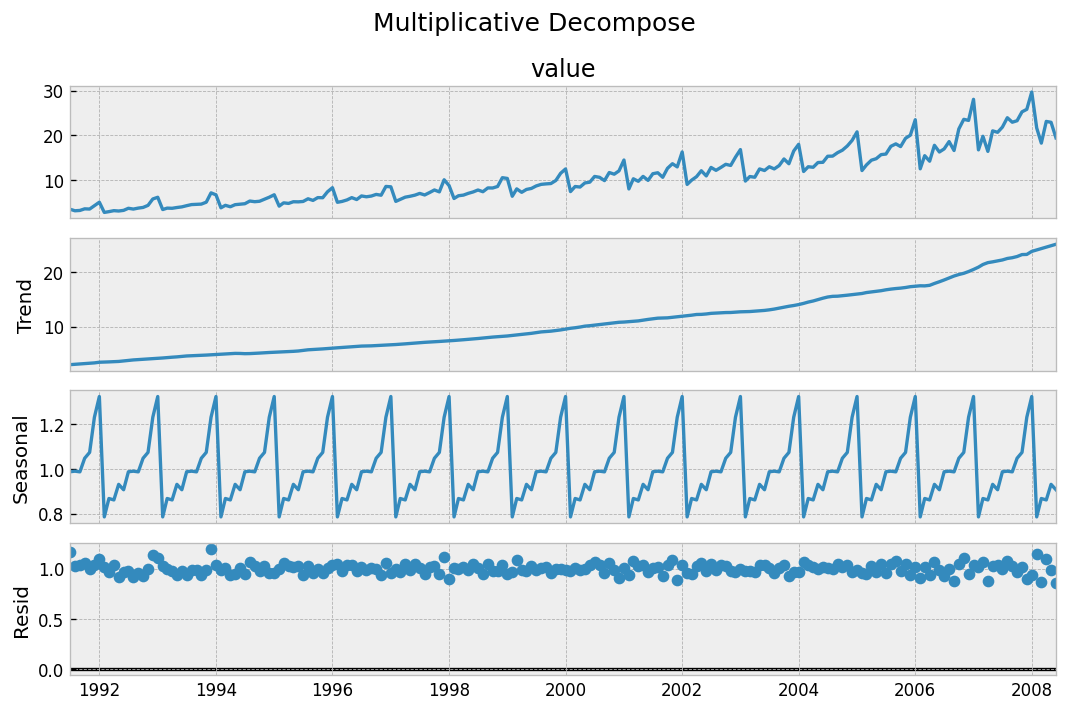

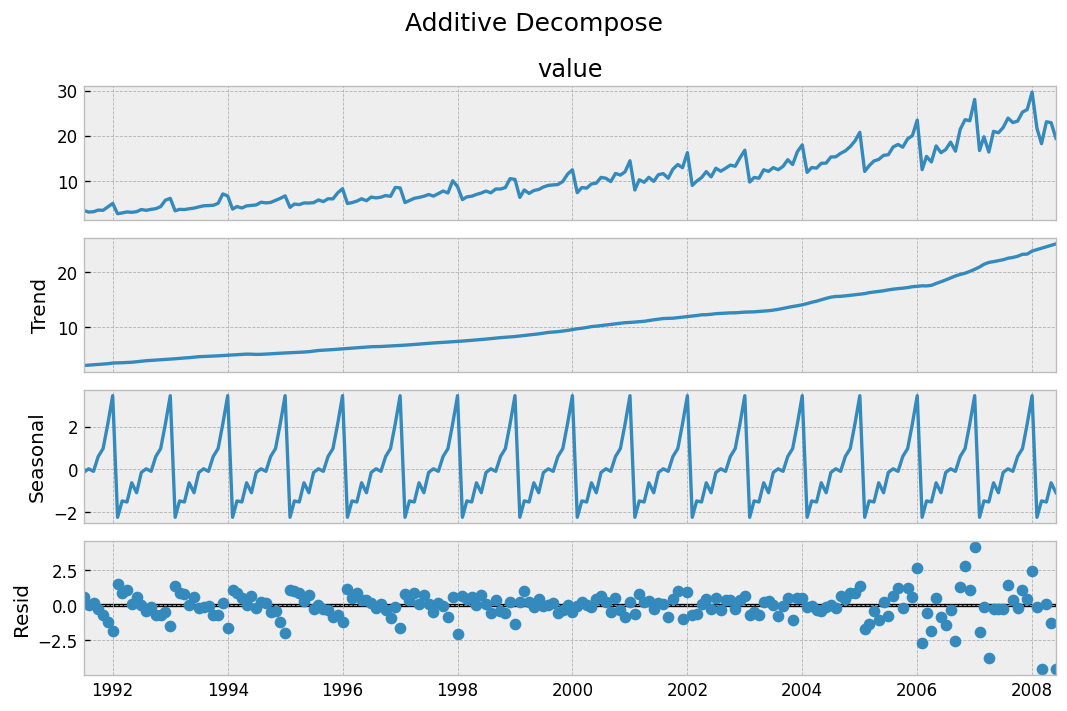

In [85]:
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=15)
result_add.plot().suptitle('Additive Decompose', fontsize=15)

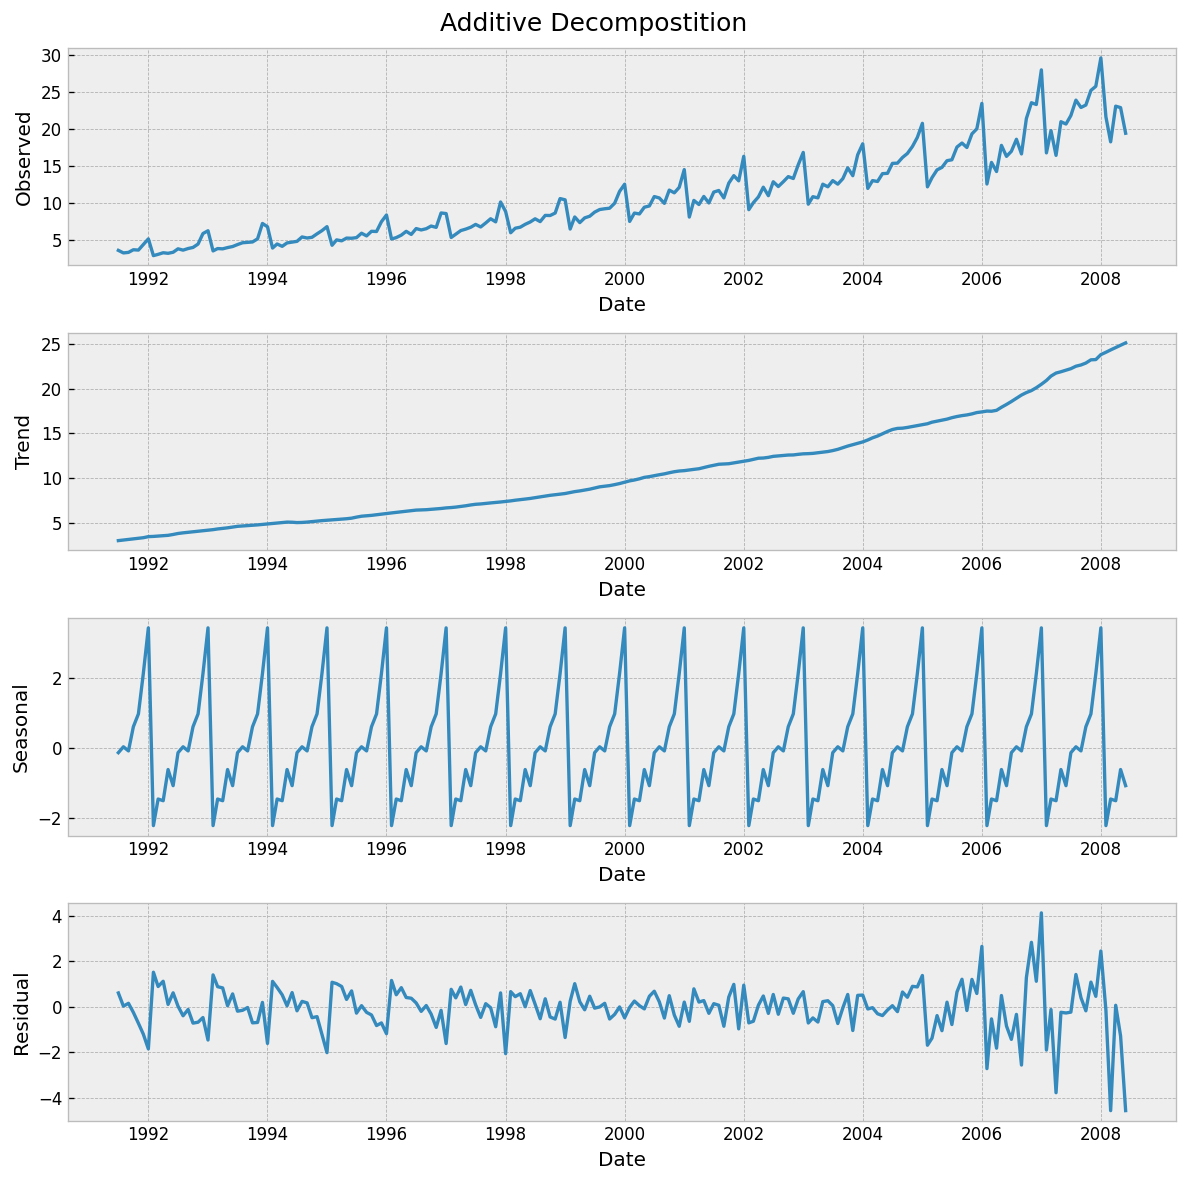

In [86]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))

axes[0].plot(result_add.observed.index, result_add.observed.values)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Observed')

axes[1].plot(result_add.trend.index, result_add.trend.values)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Trend')

axes[2].plot(result_add.seasonal.index, result_add.seasonal.values)
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Seasonal')

axes[3].plot(result_add.resid.index, result_add.resid.values)
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Residual')

plt.suptitle('Additive Decompostition', fontsize = 15)
plt.tight_layout()
plt.show()



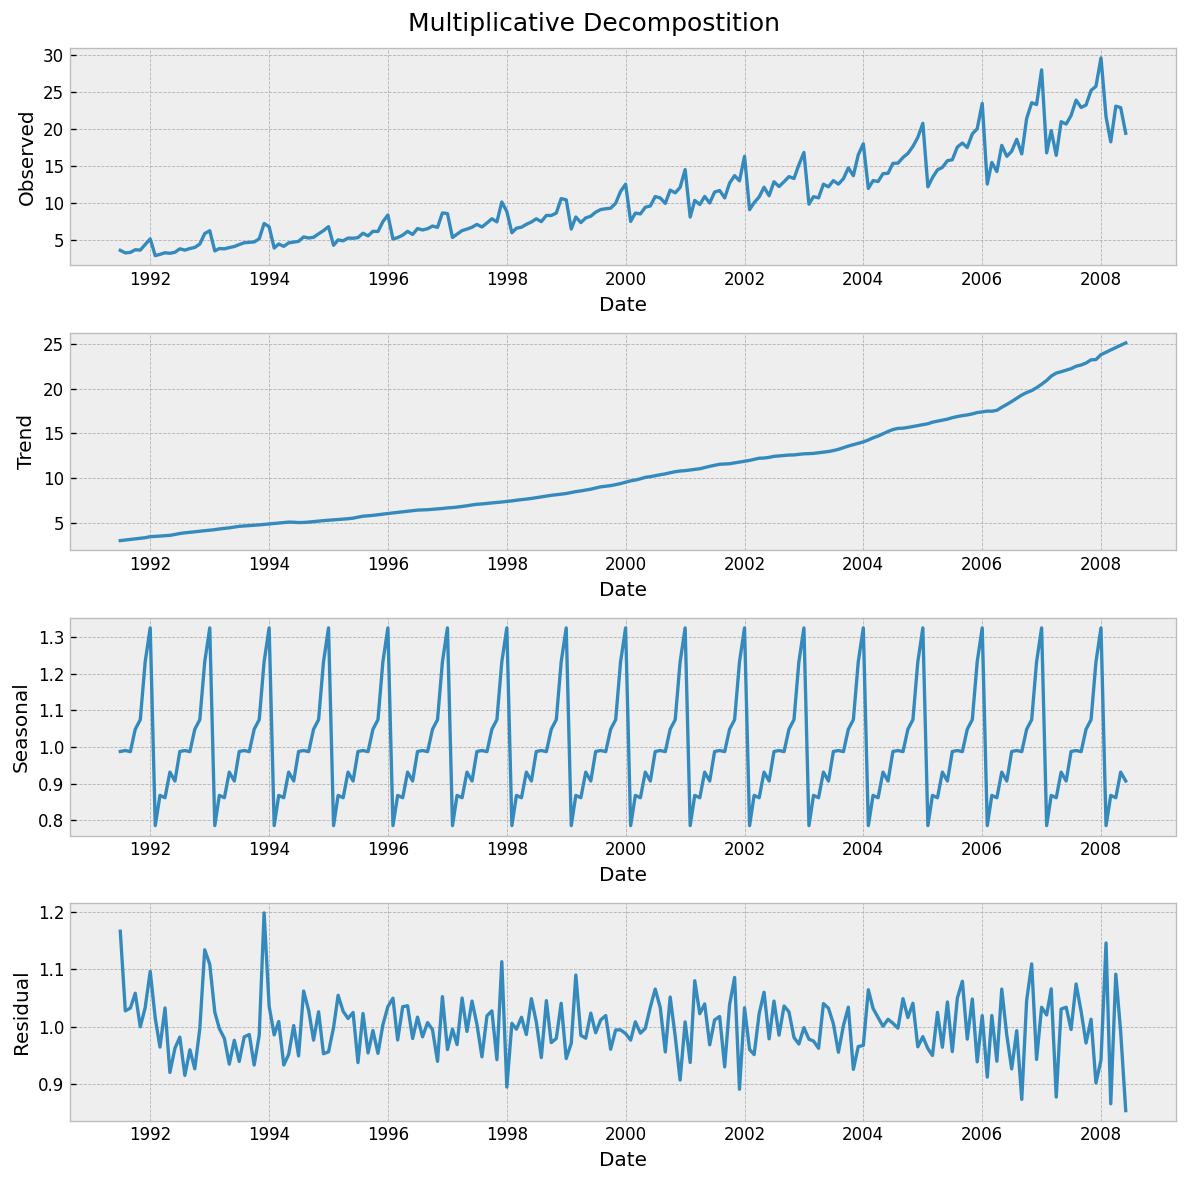

In [87]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))

axes[0].plot(result_mul.observed.index, result_mul.observed.values)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Observed')

axes[1].plot(result_mul.trend.index, result_mul.trend.values)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Trend')

axes[2].plot(result_mul.seasonal.index, result_mul.seasonal.values)
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Seasonal')

axes[3].plot(result_mul.resid.index, result_mul.resid.values)
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Residual')

plt.suptitle('Multiplicative Decompostition', fontsize = 15)
plt.tight_layout()
plt.show()


If you look at the residuals of the additive decomposition closely, it has some pattern left over. The multiplicative decomposition, however, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

In the case of the residuals of the additive decomposition having some pattern left over, it suggests that the model is not capturing all the underlying patterns in the data. This can be due to a variety of reasons such as missing variables, non-linear relationships, or non-stationarity in the data. In such cases, a multiplicative model may be more appropriate as it can capture non-linear relationships and changing variances in the data.



In [88]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed_mul = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed_mul.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed_mul.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


pd.concat function is used to concatenate these Series objects along the column axis with the column names 'seas', 'trend', 'resid', and 'actual_values', respectively. Finally, the concatenated DataFrame is assigned to the variable df_reconstructed.

In [89]:
df_reconstructed_mul['seas'][0]*df_reconstructed_mul['trend'][0]*df_reconstructed_mul['resid'][0]

3.526591

In [90]:
df_reconstructed_mul['actual_values'][0]

3.526591

The product of seas, trend and resid columns is exactly equal to the actual_values

In [91]:
df_reconstructed_add = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed_add.columns = ['seasonal', 'trend', 'resid', 'observed']
df_reconstructed_add.head()

,seasonal,trend,resid,observed
date,,,,
1991-07-01,-0.140765,3.060085,0.607271,3.526591
1991-08-01,0.027747,3.124765,0.028379,3.180891
1991-09-01,-0.090361,3.189445,0.153137,3.252221
1991-10-01,0.602876,3.254125,-0.245998,3.611003
1991-11-01,0.970698,3.318805,-0.723634,3.565869


In [92]:
df_reconstructed_add['seasonal'][0]+df_reconstructed_add['trend'][0]+df_reconstructed_add['resid'][0]

3.526591

In [93]:
df_reconstructed_add['observed'][0]

3.526591

Stationary Time Series V Non Stationary Time Series

A stationary time series is one whose statistical properties, such as the mean, variance, and autocorrelation, remain constant over time. In other words, the statistical properties of a stationary time series do not depend on the time at which the series is observed.

On the other hand, a non-stationary time series is one whose statistical properties change over time. The most common type of non-stationary time series is a trend, where the series shows a long-term increase or decrease over time. Another type of non-stationarity is seasonality, where the series shows periodic fluctuations that are repeated over time.

Autocorrelation, also known as serial correlation, is the correlation of a time series with a delayed copy of itself. In other words, it measures how similar a time series is to itself at different time lags. 

For example, consider a monthly time series of the number of visitors to a website. If there is a high autocorrelation at a lag of one month, it means that the number of visitors in one month is highly correlated with the number of visitors in the previous month. This indicates a trend in the data, where the number of visitors is either increasing or decreasing over time. On the other hand, if there is no significant autocorrelation, it means that the number of visitors is not dependent on the number of visitors in the previous month, and the data may be random or unpredictable. 

In time series analysis, time lag refers to the difference in time between two observations in a time series. For instance, if we are looking at a daily time series of stock prices, the time lag between two observations can be one day. If we are looking at a monthly time series of sales data, the time lag between two observations can be one month. Time lags are important in time series analysis as they help in understanding the dependencies between observations and can be used to compute various time series models and metrics, such as autocorrelation and cross-correlation.

A delayed copy, or lagged copy, is a copy of a time series that is shifted forward or backward in time by a certain number of time steps. It is used to calculate the autocorrelation of a time series at a specific time lag. 

For example, suppose we have a time series of daily stock prices over the past month. A delayed copy of this series would be created by shifting the entire series forward or backward by one or more days. If we shift the series back by one day, the price on each day would be matched with the price on the previous day. This allows us to calculate the autocorrelation between the price on a given day and the price on the previous day, or any other time lag we choose.

Autocorrelation can be measured using the autocorrelation function (ACF), which calculates the correlation between a time series and its delayed copies at different time lags. A plot of the ACF can provide insight into the structure of a time series, including any patterns or trends.


Making a Non Stationary Data Stationary:

Forecasting a stationary series is relatively easy and the forecasts are more reliable.

An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.

We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

It is often necessary to remove trends and seasonality from time series data before making predictions, especially if the goal is to model and forecast the underlying patterns and dynamics of the data. Here's why:

- Trends: Time series data often exhibit trends, which can make it difficult to identify the underlying patterns and dynamics in the data. Removing the trend can help make the data stationary, which is a key assumption for many time series forecasting models. Stationary data have constant mean and variance over time, which makes it easier to identify the underlying patterns and make accurate predictions.

- Seasonality: Time series data can also exhibit seasonal patterns, such as weekly or monthly cycles. These patterns can make it difficult to identify the underlying trends and dynamics in the data. Removing seasonality can help make the data stationary and easier to model. One common approach for removing seasonality is to use seasonal differencing, which involves taking the difference between observations at the same point in different seasons.

That said, there may be cases where trends and seasonality are important and should not be removed. For example, if the goal is to understand the overall trend in a particular market, then removing the trend would not be appropriate. Similarly, if the goal is to forecast seasonal patterns, then removing seasonality would be counterproductive. Therefore, the decision of whether to remove trends and seasonality depends on the specific context and goals of the analysis.

Making A Time Series Stationary:

Making a time series stationary involves removing the trend and seasonality components from the series. This can be done through various techniques such as:

1. Differencing: taking the difference between consecutive data points to remove the trend component. If the series has seasonality, seasonal differencing can also be used, which involves taking the difference between data points at the same season from one year to another.

2. Decomposition: decomposing the series into its trend, seasonal, and residual components using methods like moving averages or seasonal decomposition, and then removing the trend and seasonal components to obtain a stationary residual series.

3. Transformation: applying mathematical transformations such as logarithmic or square root transformation to reduce the trend in the data.

Once the time series is stationary, it can be analyzed using various statistical models and techniques, such as ARIMA, to make forecasts.

Differencing is a common method to make a time series stationary. It involves subtracting each value in the series from the previous value, which eliminates the trend component.If the resulting series still has a seasonal component, further differencing may be necessary. Once the series is stationary, it can be used for time series modeling and forecasting.

You can make series stationary by:

Take the log of the series: Taking the logarithm of a time series is a common method to stabilize the variance of the series. This is particularly useful when the variance of the series increases over time, which can make it difficult to model and forecast accurately. By taking the logarithm, we can often reduce the magnitude of the fluctuations in the series, making it more stationary and easier to work with.

Take the nth root of the series: Taking the nth root of the series can also be a way to make a non-stationary series stationary. This method is usually used when the series shows an exponential growth or decay trend. For example, if the series shows an exponential growth, taking the square root or cube root of the series can help to make the series stationary. This method is based on the idea that the nth root of an exponentially growing series results in a linearly growing series, which can be more stationary compared to the original series. Similarly, taking the nth root of an exponentially decaying series results in a linearly decaying series.However, this method may not always work and is dependent on the nature of the series. It is always recommended to check the stationarity of the transformed series before proceeding with time series analysis. 

Combination of the above: For example, taking the log and then differencing the series or taking the nth root and then differencing the series can be used. The choice of method(s) used to stationarize a time series depends on the specific characteristics of the series and the analysis goals.

The most common and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

For example, consider the following series: [1, 5, 2, 12, 20]

First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]

Second differencing gives: [-3-4, -10-3, 8-10] = [-7, -13, -2]

Second differencing can be used when first differencing is not enough to make the series stationary. However, it is important to note that higher order differencing may lead to loss of information and make the series more difficult to interpret.

Testing For Stationarity:

The stationarity of a series can be established by looking at the plot of the series like we did earlier. We can quantitavely determine if a series is not stationary using statistical tests such as: 

1. Augmented Dickey-Fuller (ADF) test: This test is used to test for the presence of a unit root in the time series. A unit root is an indication of non-stationarity. The null hypothesis of the test is that the series has a unit root, while the alternative hypothesis is that the series is stationary. If the p-value of the test is less than the significance level (e.g. 0.05), then we reject the null hypothesis and conclude that the series is stationary.

2. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test: This test is used to test for trend-stationarity of a time series. Trend-stationarity means that the time series has a deterministic trend that can be removed to make the series stationary. The null hypothesis of the test is that the series is trend-stationary, while the alternative hypothesis is that the series is non-stationary. If the p-value of the test is less than the significance level (e.g. 0.05), then we reject the null hypothesis and conclude that the series is non-stationary.

3. Phillips-Perron (PP) test: This test is similar to the ADF test and is used to test for the presence of a unit root in the time series. However, the PP test is robust to the presence of autocorrelated errors, which makes it a preferred alternative to the ADF test when the errors are correlated. The null hypothesis of the test is that the series has a unit root, while the alternative hypothesis is that the series is stationary. If the p-value of the test is less than the significance level (e.g. 0.05), then we reject the null hypothesis and conclude that the series is stationary.


In [94]:
from statsmodels.tsa.stattools import adfuller, kpss
df = pd.read_csv('a10.csv', parse_dates=["date"])

# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.1451856893067283
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


In [95]:
type(result)


tuple

In [96]:
result

(3.1451856893067283,
 1.0,
 15,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 549.6705685364172)

The output shows the results of an Augmented Dickey-Fuller (ADF) test, which is used to test for the presence of a unit root in a time series. The null hypothesis of the ADF test is that the time series has a unit root, meaning that it is non-stationary. The alternative hypothesis is that the time series is stationary. 

The ADF statistic is a test statistic that measures how many standard deviations the time series is away from being stationary. In this case, the ADF statistic is 3.1451856893067283, which is larger than the critical values at the 1%, 5%, and 10% levels, indicating that we cannot reject the null hypothesis of a unit root and that the time series is likely non-stationary. 

The p-value of 1.0 confirms that the test results are not significant, meaning that we cannot reject the null hypothesis. The critical values shown are the threshold values at which we would reject the null hypothesis at the specified significance levels. Since the ADF statistic is greater than these critical values, we cannot reject the null hypothesis of a unit root and conclude that the time series is non-stationary.

In [97]:
# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 2.013126
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/var/folders/x_/ydljc2zn6z30j2fhr27cbr4h0000gn/T/ipykernel_867/2682376914.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df.value.values, regression='c')


In [98]:
result


(2.0131256386303322,
 0.01,
 9,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

The KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test is a statistical test used to determine if a time series is trend stationary or not. The null hypothesis of the KPSS test is that the series is trend stationary (meaning it has a constant mean and variance over time), while the alternative hypothesis is that the series is non-stationary with a unit root (meaning it has a trend and/or a changing variance over time).

In the output you provided, the KPSS statistic is 2.013126, which is greater than the critical value at the 5% level of significance (0.463). This suggests that we reject the null hypothesis of trend-stationarity and conclude that the series is non-stationary. The p-value of 0.01 also supports this conclusion, as it is less than the significance level of 0.05. 

The critical values represent the threshold values for rejecting the null hypothesis at different levels of significance (1%, 5%, 10%). If the KPSS statistic is greater than the critical value, then we reject the null hypothesis and conclude that the series is non-stationary.

Critical Values

In time series analysis, critical values are used as a threshold to determine the significance of test statistics. Specifically, critical values are used to determine whether the null hypothesis should be rejected or not. 

In the context of the ADF and KPSS tests, the critical values are calculated based on the desired level of significance, which is typically set at 1%, 5%, or 10%. The critical values represent the value of the test statistic at which the null hypothesis can be rejected at the specified level of significance. 

For example, in the ADF test output provided earlier, the critical values at the 1%, 5%, and 10% significance levels are -3.4656, -2.8770, and -2.5750, respectively. This means that if the calculated ADF statistic is less than the critical value, then the null hypothesis (that the time series is non-stationary) can be rejected at the specified level of significance.

Similarly, in the KPSS test output, the critical values at the 10%, 5%, 2.5%, and 1% significance levels are 0.347, 0.463, 0.574, and 0.739, respectively. If the calculated KPSS statistic is greater than the critical value, then the null hypothesis (that the time series is stationary) can be rejected at the specified level of significance.

The reason for this apparent contradiction lies in the null hypotheses being tested by the ADF and KPSS tests. 

The null hypothesis for the ADF test is that the time series has a unit root and is non-stationary. If the ADF statistic is smaller (more negative) than the critical values, then we can reject the null hypothesis and conclude that the time series is stationary.

On the other hand, the null hypothesis for the KPSS test is that the time series is stationary (trend-stationary or difference-stationary). If the KPSS statistic is greater than the critical values, then we can reject the null hypothesis and conclude that the time series is non-stationary.

So, in summary, the ADF test checks for the presence of a unit root, which implies non-stationarity, and rejects the null hypothesis if the ADF statistic is smaller (more negative) than the critical values. The KPSS test checks for the absence of a trend, which implies stationarity, and rejects the null hypothesis if the KPSS statistic is greater than the critical values.


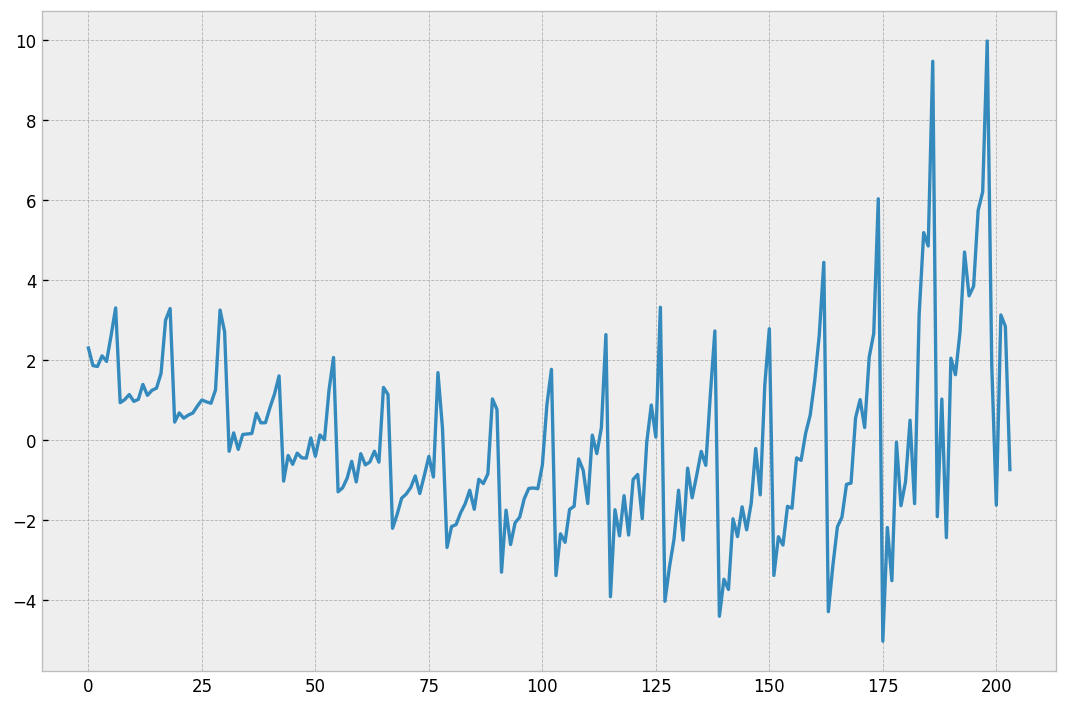

In [99]:
#Detrending A Time Series
# By subtracting the line of best fit
from scipy import signal
import pandas as pd
df = pd.read_csv('a10.csv', parse_dates=['date'])
detrended = signal.detrend(df.value.values)
plt.plot(detrended)


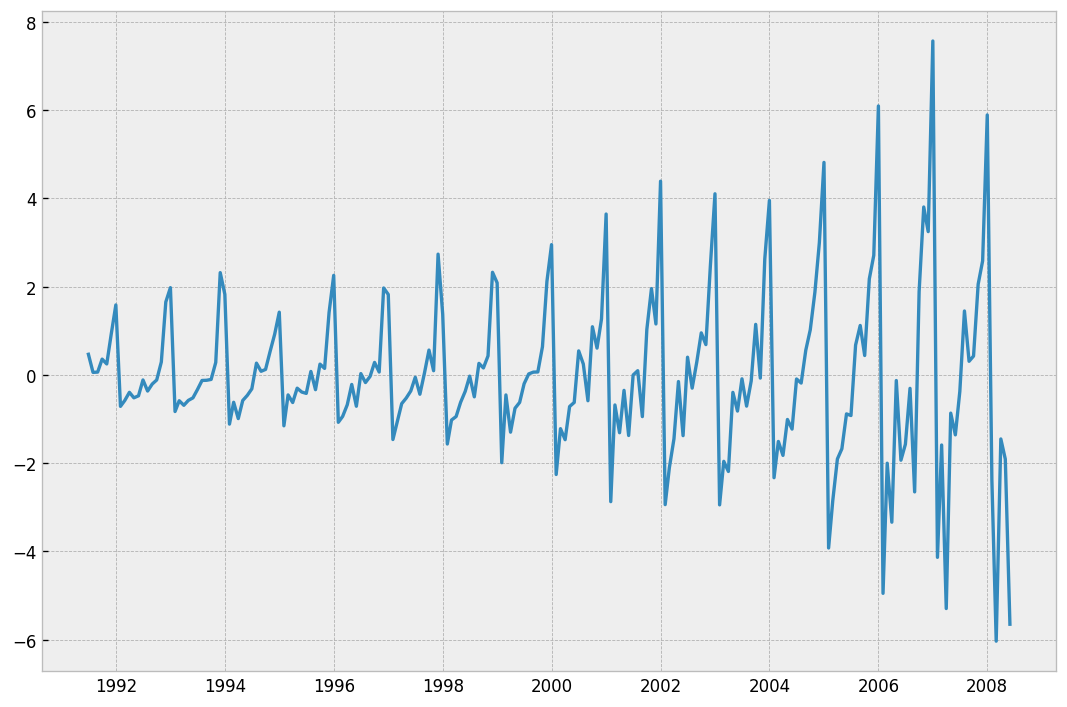

In [100]:
#By subtracting the trend component
detrend = df.value.values-result_mul.trend
plt.plot(detrend)


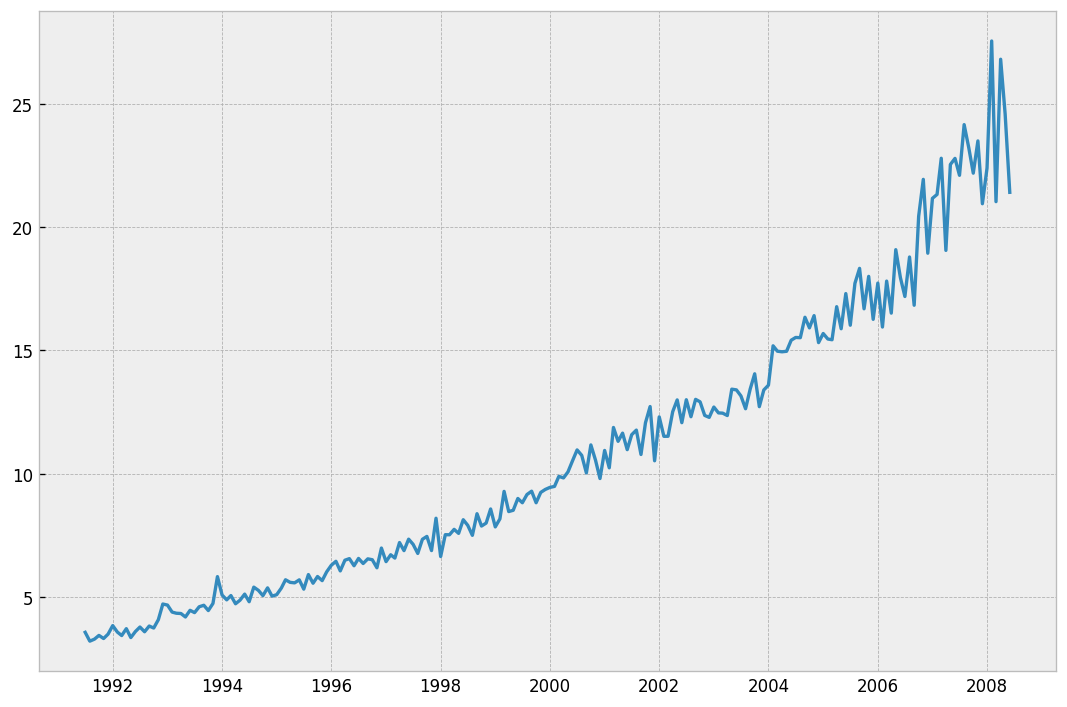

In [101]:
#Deseasonalizing a Time Series
import matplotlib.pyplot as plt
deseasonalize = df.value.values/ result_mul.seasonal
plt.plot(deseasonalize)

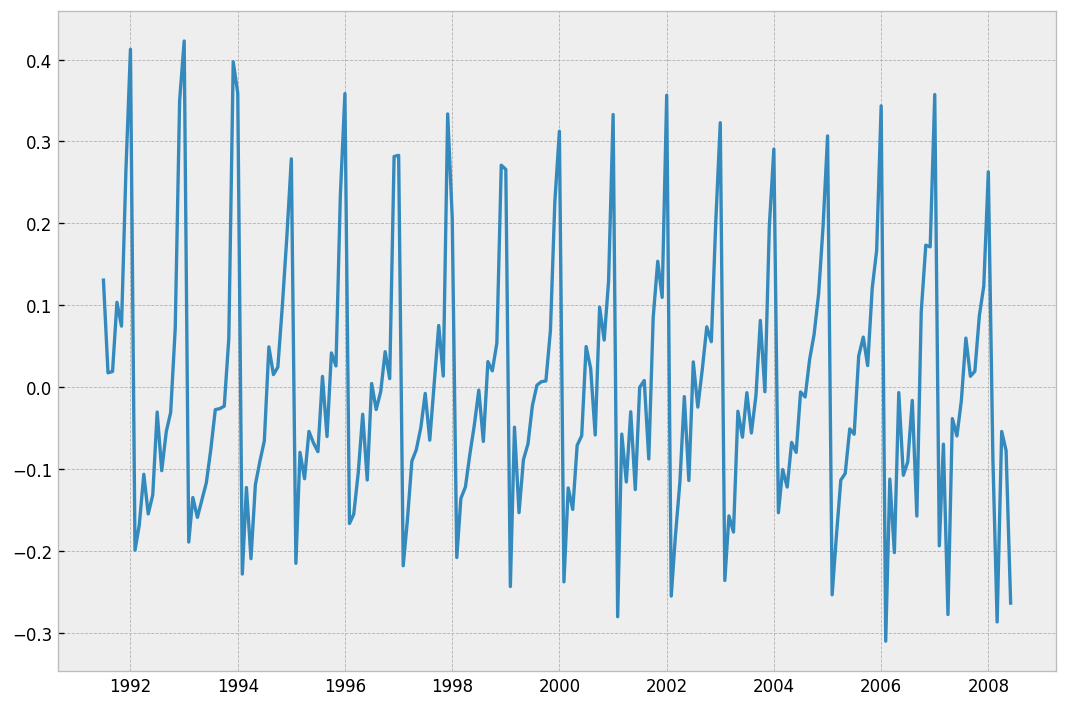

In [102]:
stationary = detrend/deseasonalize
plt.plot(stationary)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

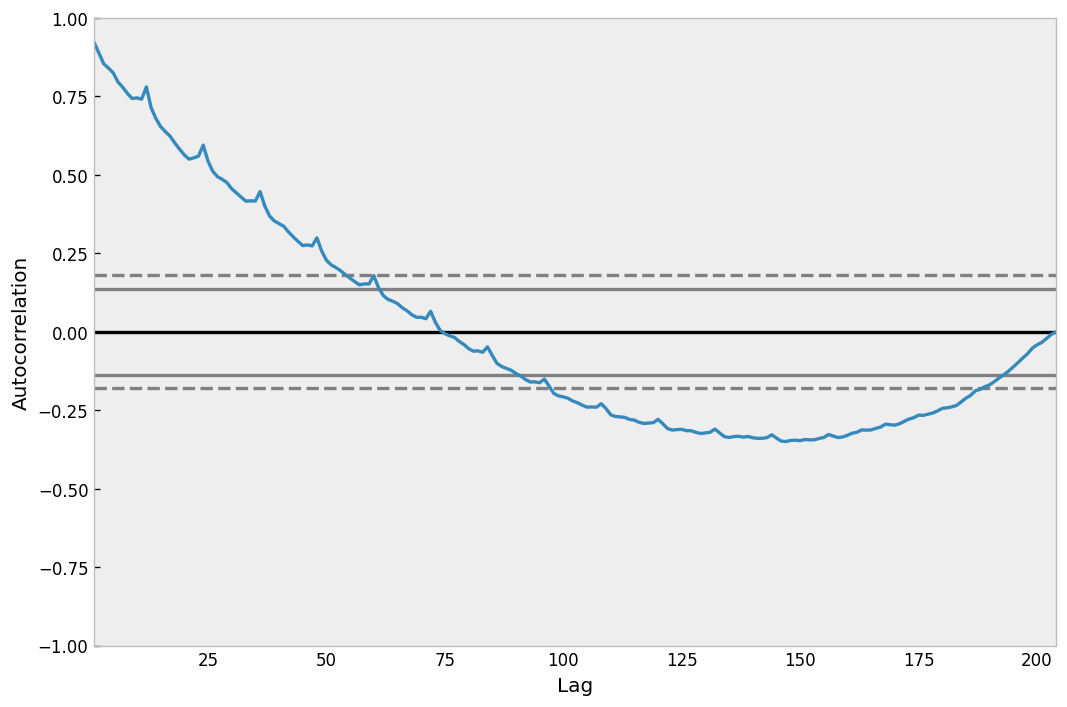

In [103]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.value.tolist())

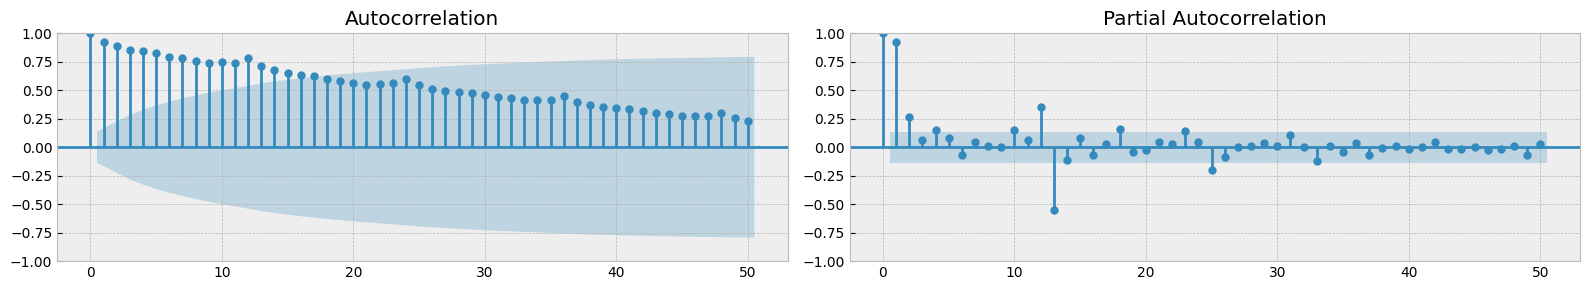

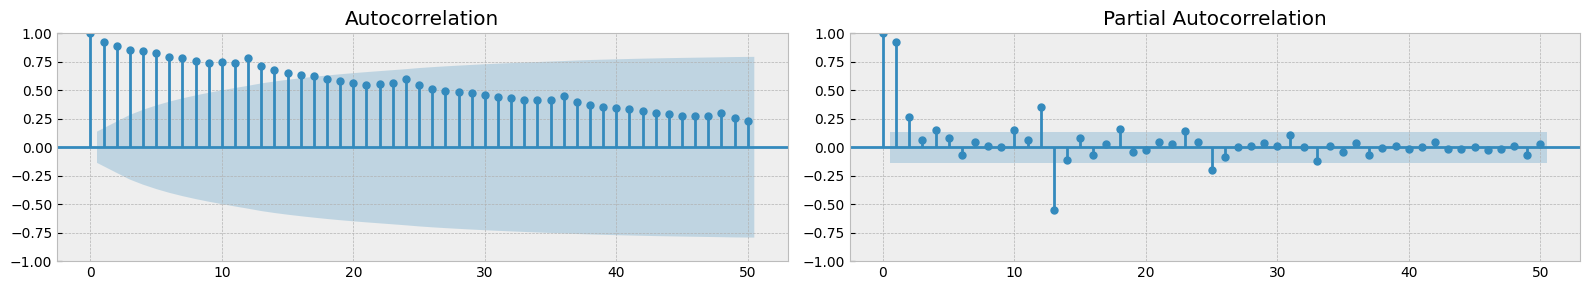

In [104]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 3), dpi = 100)
plot_acf(df.value.tolist(), lags = 50, ax=axes[0])
plot_pacf(df.value.tolist(), lags = 50, ax=axes[1])





Text(0.5, 1.15, 'Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n')

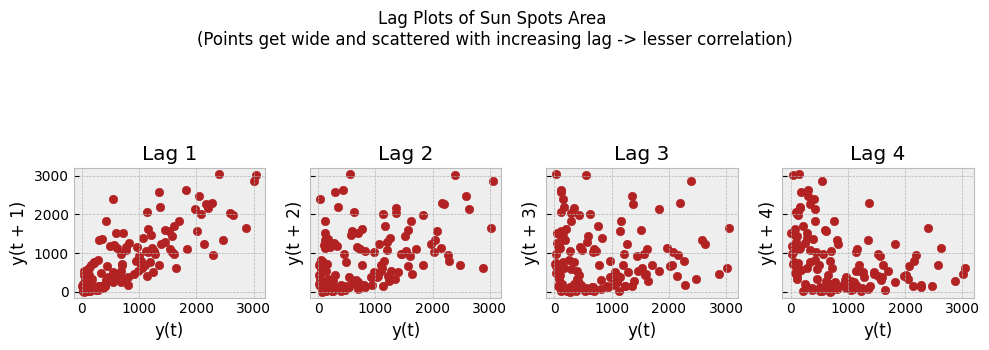

In [105]:
from pandas.plotting import lag_plot

ss = pd.read_csv('sunspotarea.csv')
a10 = pd.read_csv('a10.csv')

fig, axes = plt.subplots(1, 4, figsize = (10,3), sharex = True, sharey = True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag = i+1, ax=ax, c = 'firebrick')
    ax.set_title('Lag '+str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)   


Text(0.5, 1.05, 'Lag Plots of Drug Sales')

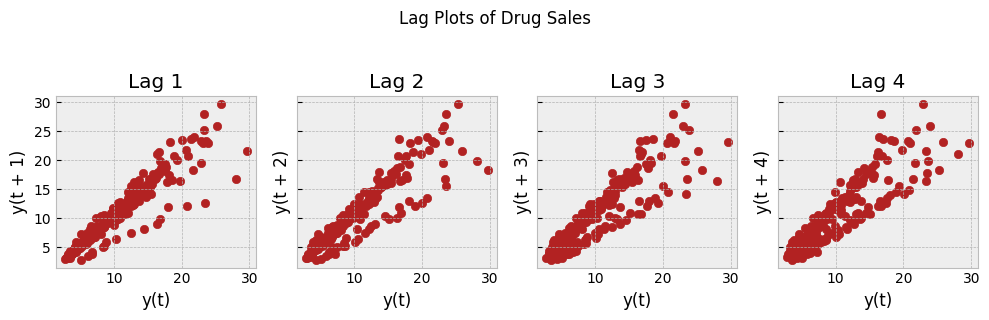

In [106]:
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    


In [107]:
#treating Missing Values

from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
import pandas as pd

df_original = pd.read_csv('a10.csv', parse_dates=['date'], index_col='date').head(100)

df_original

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
1999-06-01,8.165323
1999-07-01,8.717420
1999-08-01,9.070964


In [108]:
df_original.shape

(100, 1)

In [109]:
df_original['value'][99]

9.25188674

In [110]:
df_new =pd.read_csv('a10_missings.csv', parse_dates=['date'], index_col='date')
df_new


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,NaN
1991-10-01,3.611003
1991-11-01,NaN
...,...
1999-06-01,8.165323
1999-07-01,NaN
1999-08-01,9.070964


In [111]:
df_new.shape

(100, 1)

In [112]:
df_forward = df_new.ffill()
df_forward

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.180891
1991-10-01,3.611003
1991-11-01,3.611003
...,...
1999-06-01,8.165323
1999-07-01,8.165323
1999-08-01,9.070964


In [113]:
df_new

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,NaN
1991-10-01,3.611003
1991-11-01,NaN
...,...
1999-06-01,8.165323
1999-07-01,NaN
1999-08-01,9.070964


In [114]:
dfmodern = df_new.fillna(0, inplace = False)
dfmodern


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,0.000000
1991-10-01,3.611003
1991-11-01,0.000000
...,...
1999-06-01,8.165323
1999-07-01,0.000000
1999-08-01,9.070964


In [115]:
import numpy as np
df_new_forward = df_new.ffill()-dfmodern
df_new_forward.replace(to_replace=0, value=np.nan, inplace=True)
df_new_forward

,value
date,
1991-07-01,NaN
1991-08-01,NaN
1991-09-01,3.180891
1991-10-01,NaN
1991-11-01,3.611003
...,...
1999-06-01,NaN
1999-07-01,8.165323
1999-08-01,NaN


/var/folders/x_/ydljc2zn6z30j2fhr27cbr4h0000gn/T/ipykernel_867/575901177.py:98: RuntimeWarning: Mean of empty slice
  if np.isnan(np.nanmean(ts_seas)):


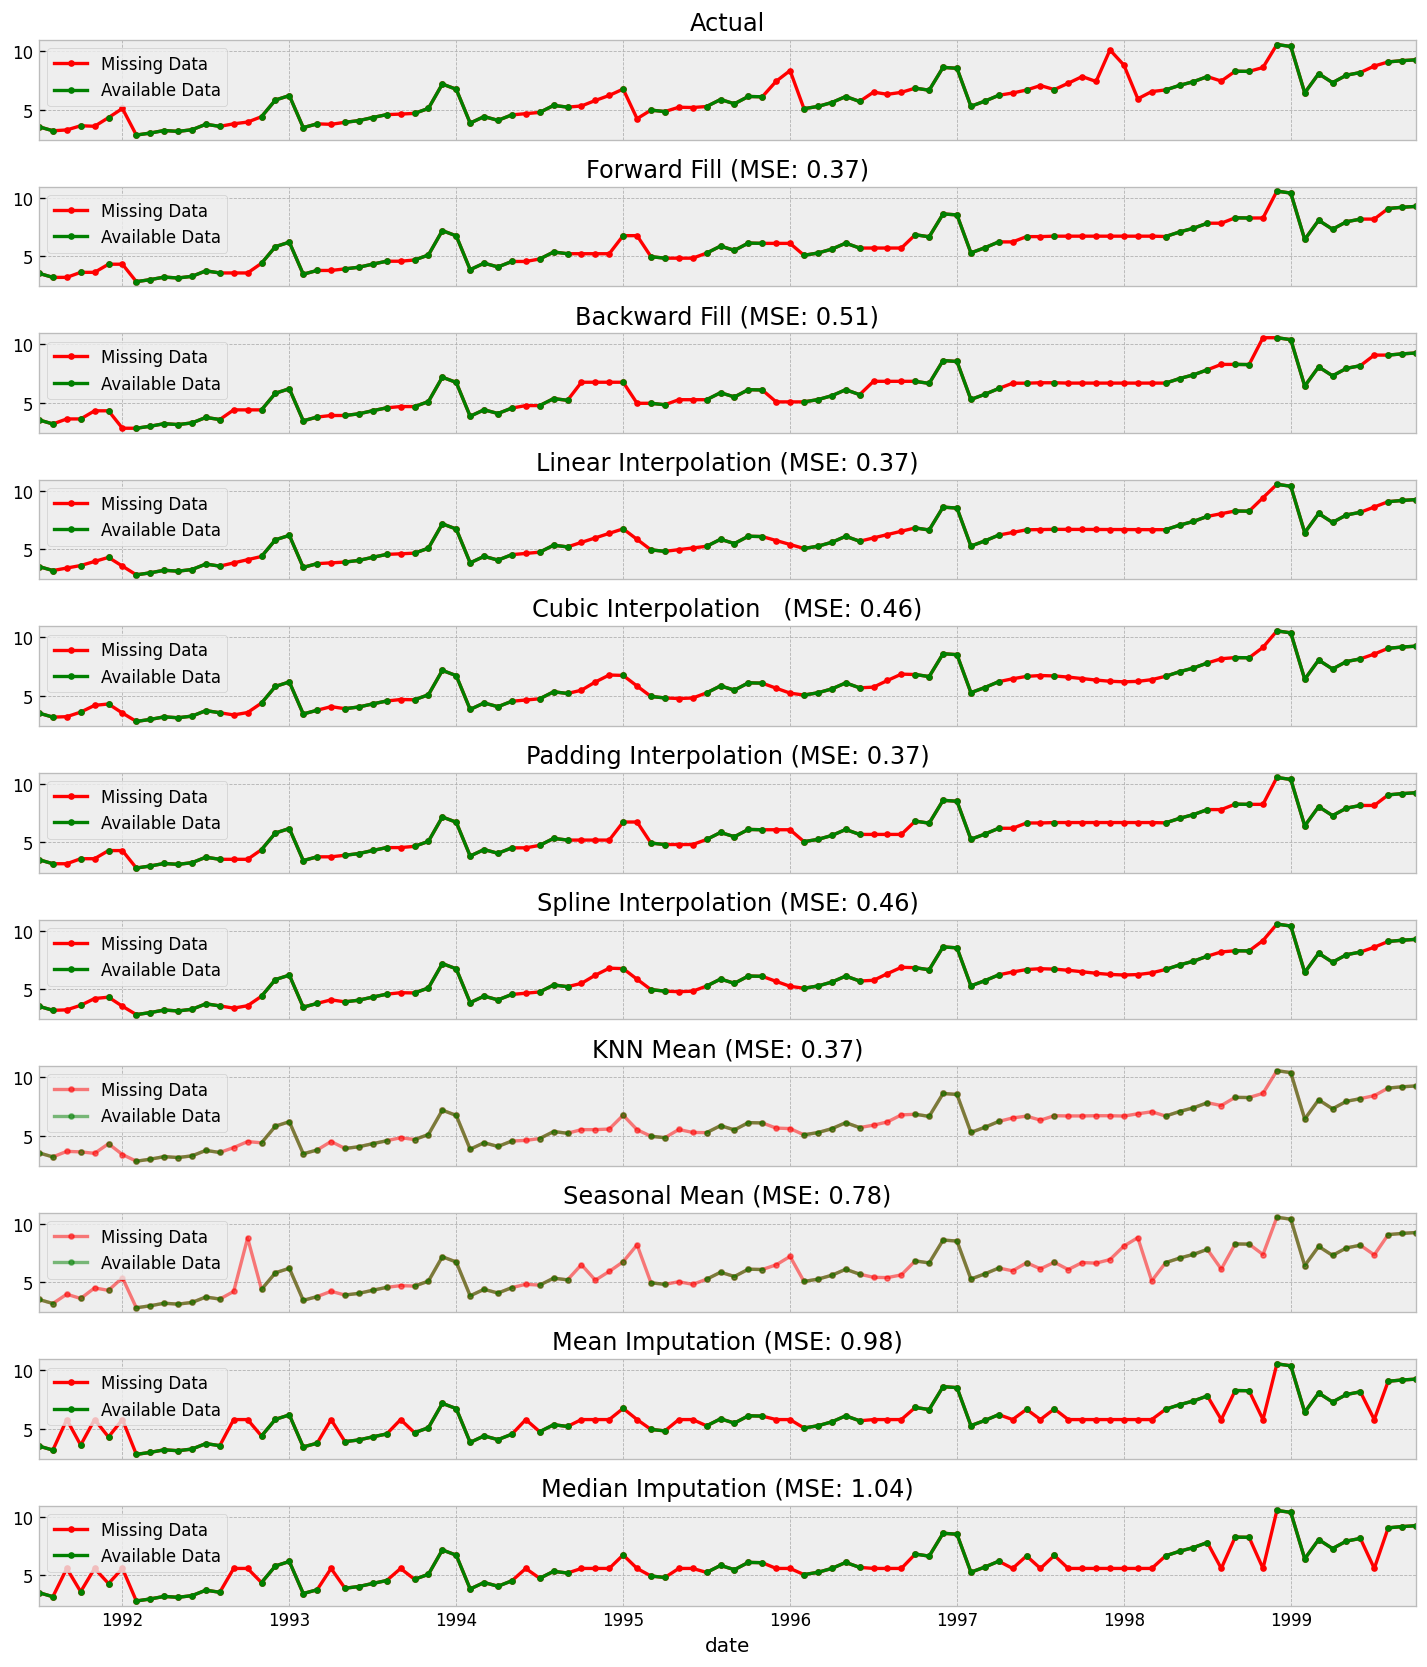

In [122]:
from scipy.interpolate import interp1d, UnivariateSpline
from sklearn.metrics import mean_squared_error
from scipy import interpolate

df_orig = pd.read_csv('a10.csv', parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv('a10_missings.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(11, 1, sharex=True, figsize=(12, 14))
plt.rcParams.update({'xtick.bottom' : False})

#Actual 
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

#Forward Fill 
df_ffill =df_new.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill.plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], color ='red',  label='Forward Fill', style=".-")
df_new.plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], color = 'green',label='Forward Fill', style=".-")
axes[1].legend(["Missing Data", "Available Data"])

#Backward Fill 
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='red', style=".-")
df_new.plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='green', style=".-")
axes[2].legend(["Missing Data", "Available Data"])

#Linear Interpolation 
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Interpolation (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='red', style=".-")
df_new.plot(title="Linear Interpolation (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='green', style=".-")
axes[3].legend(["Missing Data", "Available Data"])


#Cubic Interpolation 
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Interpolation  (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")
df_new.plot(title="Cubic Interpolation   (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='green', style=".-")
axes[4].legend(["Missing Data", "Available Data"])

#Padding Interpolation 
df_padding = df_new.copy()
df_padding['value'] = df_padding['value'].interpolate(method='pad')
error = np.round(mean_squared_error(df_orig['value'], df_padding['value']), 2)
df_padding.plot(title="Original Data", ax=axes[5], label='Original Data', color='red', style=".-")
df_new.plot(title="Padding Interpolation (MSE: " + str(error) + ")", ax=axes[5], label='Padding Interpolation', color='green', style=".-")
axes[5].legend(["Missing Data", "Available Data"])

#Spline Interpolation 
df_spline = df_new.copy()
missing_indices = np.where(df_spline['value'].isnull())[0]
x = np.arange(len(df_spline["value"]))
y = df_spline["value"].values
spline = UnivariateSpline(x[~np.isnan(y)], y[~np.isnan(y)], k=3, s=0)
df_spline.loc[df_spline['value'].isnull(), 'value'] = spline(missing_indices)
error = np.round(mean_squared_error(df_orig['value'], df_spline['value']), 2)
df_spline.plot(title="Spline Interpolation (MSE: " + str(error) + ")", ax=axes[6], label='Spline Fill', color='red', style=".-")
df_new.plot(title="Spline Interpolation (MSE: " + str(error) + ")", ax=axes[6], label='Spline Fill', color='green', style=".-")
axes[6].legend(["Missing Data", "Available Data"])

#Mean of 'n' Nearest Past Neighbors
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[7], label='KNN Mean', color='red', alpha=0.5, style=".-")
df_new.plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[7], label='KNN Mean', color='green', alpha=0.5, style=".-")
axes[7].legend(["Missing Data", "Available Data"])

#Seasonal Mean 
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[8], label='Seasonal Mean', color='red', alpha=0.5, style=".-")
df_new.plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[8], label='Seasonal Mean', color='green', alpha=0.5, style=".-")
axes[8].legend(["Missing Data", "Available Data"])

#Mean Imputation 
df_meanfill = df_new.fillna(df_new.mean())
error = np.round(mean_squared_error(df_orig['value'], df_meanfill['value']), 2)
df_meanfill['value'].plot(title="Mean Imputation (MSE: " + str(error) +")", ax=axes[9], label='Mean Imputation', color='red', style=".-")
df_new.plot(title="Mean Imputation (MSE: " + str(error) +")", ax=axes[9], label='Mean Imputation', color='green', style=".-")
axes[9].legend(["Missing Data", "Available Data"])

#Median Imputation
df_medianfill = df_new.fillna(df_new.median())
error = np.round(mean_squared_error(df_orig['value'], df_medianfill['value']), 2)
df_medianfill['value'].plot(title="Median Imputation (MSE: " + str(error) +")", ax=axes[10], label='Median Imputation', color='red', style=".-")
df_new.plot(title="Median Imputation (MSE: " + str(error) +")", ax=axes[10], label='Median Imputation', color='green', style=".-")
axes[10].legend(["Missing Data", "Available Data"])

In [121]:
df_new

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,NaN
1991-10-01,3.611003
1991-11-01,NaN
...,...
1999-06-01,8.165323
1999-07-01,NaN
1999-08-01,9.070964
